In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
df = pd.read_csv('all_data_combined.csv')

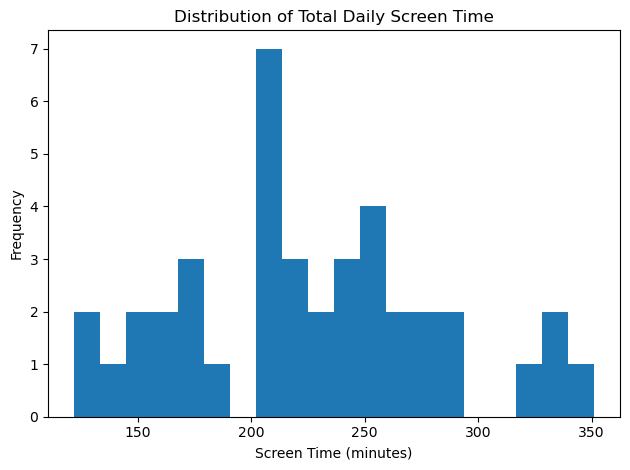

In [16]:
# 1. Histogram: Distribution of Total Daily Screen Time
plt.figure()
plt.hist(df['total_screen_minutes'], bins=20)
plt.title('Distribution of Total Daily Screen Time')
plt.xlabel('Screen Time (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

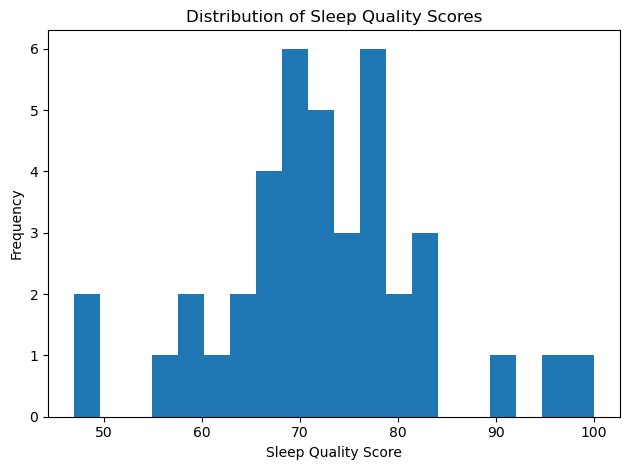

In [17]:
# 2. Histogram: Distribution of Sleep Quality Scores
plt.figure()
plt.hist(df['sleep_quality_score'], bins=20)
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

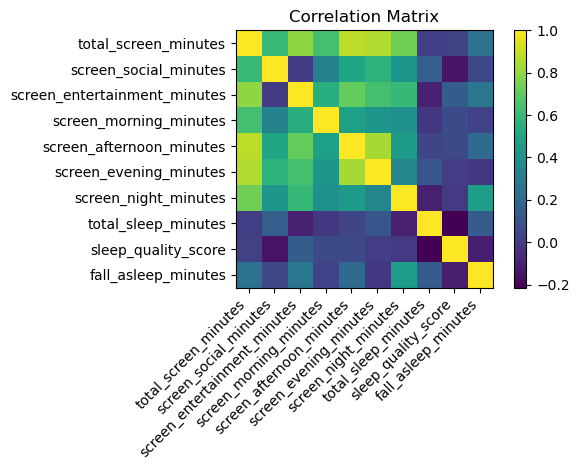

In [18]:
# 3. Correlation Matrix Heatmap
cols = [
    'total_screen_minutes',
    'screen_social_minutes',
    'screen_entertainment_minutes',
    'screen_morning_minutes',
    'screen_afternoon_minutes',
    'screen_evening_minutes',
    'screen_night_minutes',
    'total_sleep_minutes',
    'sleep_quality_score',
    'fall_asleep_minutes'
]
corr = df[cols].corr()
fig, ax = plt.subplots()
im = ax.imshow(corr.values, cmap='viridis')
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols)
plt.colorbar(im)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

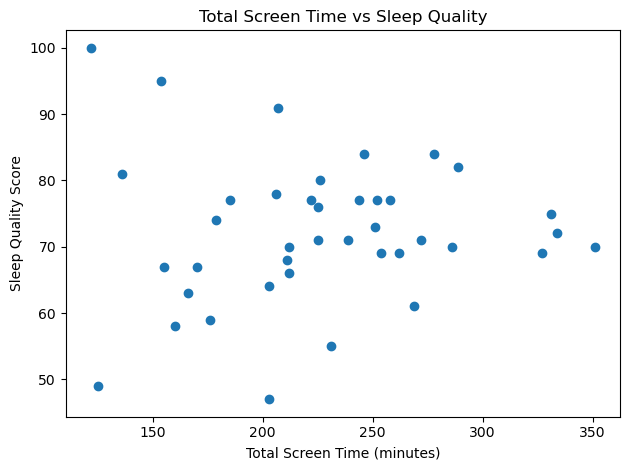

In [19]:
# 4. Scatter: Total Screen Time vs Sleep Quality
plt.figure()
plt.scatter(df['total_screen_minutes'], df['sleep_quality_score'])
plt.title('Total Screen Time vs Sleep Quality')
plt.xlabel('Total Screen Time (minutes)')
plt.ylabel('Sleep Quality Score')
plt.tight_layout()
plt.show()

C:\Users\Arda\AppData\Local\Temp\ipykernel_2524\4182806989.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


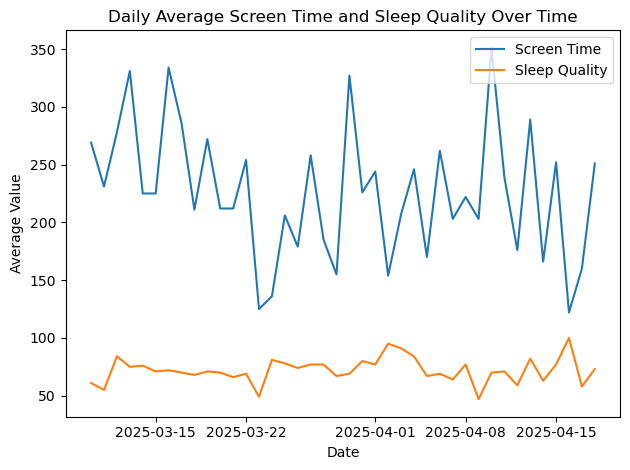

In [22]:
# 5. Time Series: Daily Average Screen Time and Sleep Quality
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.set_index('date')
daily = df[['total_screen_minutes', 'sleep_quality_score']].resample('D').mean()
plt.figure()
plt.plot(daily.index, daily['total_screen_minutes'], label='Screen Time')
plt.plot(daily.index, daily['sleep_quality_score'], label='Sleep Quality')
plt.title('Daily Average Screen Time and Sleep Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.legend()
plt.tight_layout()
plt.show()

Pearson correlation (r) = 0.023
P-value = 0.889

                             OLS Regression Results                            
Dep. Variable:     sleep_quality_score   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.026
Method:                  Least Squares   F-statistic:                   0.01975
Date:                 Fri, 25 Apr 2025   Prob (F-statistic):              0.889
Time:                         17:03:56   Log-Likelihood:                -151.71
No. Observations:                   40   AIC:                             307.4
Df Residuals:                       38   BIC:                             310.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

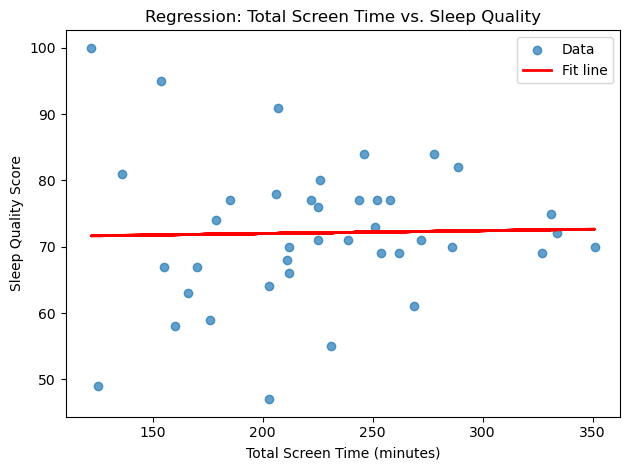

In [4]:
# 1. Pearson correlation test for first hypothesis
r_value, p_value = pearsonr(df['total_screen_minutes'], df['sleep_quality_score'])
print(f"Pearson correlation (r) = {r_value:.3f}")
print(f"P-value = {p_value:.3f}\n")

X = sm.add_constant(df['total_screen_minutes'])
model = sm.OLS(df['sleep_quality_score'], X).fit()
print(model.summary())

plt.figure()
plt.scatter(df['total_screen_minutes'], df['sleep_quality_score'], alpha=0.7, label='Data')
predicted = model.predict(X)
plt.plot(df['total_screen_minutes'], predicted, color='red', linewidth=2, label='Fit line')
plt.title('Regression: Total Screen Time vs. Sleep Quality')
plt.xlabel('Total Screen Time (minutes)')
plt.ylabel('Sleep Quality Score')
plt.legend()
plt.tight_layout()
plt.show()

Pearson correlation (r) = 0.464
P-value = 0.003

                             OLS Regression Results                            
Dep. Variable:     fall_asleep_minutes   R-squared:                       0.216
Model:                             OLS   Adj. R-squared:                  0.195
Method:                  Least Squares   F-statistic:                     10.45
Date:                 Fri, 25 Apr 2025   Prob (F-statistic):            0.00254
Time:                         17:07:16   Log-Likelihood:                -118.40
No. Observations:                   40   AIC:                             240.8
Df Residuals:                       38   BIC:                             244.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

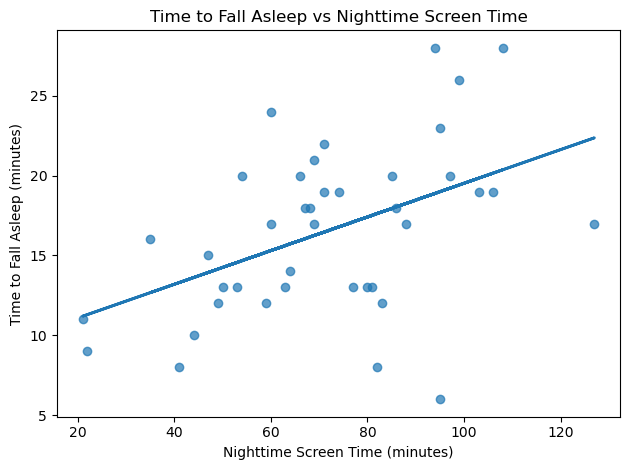

In [5]:
# 1. Pearson correlation test for second hypothesis
r2, p2 = pearsonr(df['screen_night_minutes'], df['fall_asleep_minutes'])
print(f"Pearson correlation (r) = {r2:.3f}")
print(f"P-value = {p2:.3f}\n")

X2 = sm.add_constant(df['screen_night_minutes'])
model2 = sm.OLS(df['fall_asleep_minutes'], X2).fit()
print(model2.summary())

plt.figure()
plt.scatter(df['screen_night_minutes'], df['fall_asleep_minutes'], alpha=0.7)
pred2 = model2.predict(X2)
plt.plot(df['screen_night_minutes'], pred2, linewidth=2)
plt.title('Time to Fall Asleep vs Nighttime Screen Time')
plt.xlabel('Nighttime Screen Time (minutes)')
plt.ylabel('Time to Fall Asleep (minutes)')
plt.tight_layout()
plt.show()